# 프로젝트 : 다양한 OCR모델 비교하기

### 루브릭
|No.|평가문항|상세기준|
|:---|:---|:---|
|1|OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
|2|모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|3|평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

## 0. 서비스 기획(안)
- 내가 궁금한 화장품의 이미지를 스마트폰 카메라로 촬영하면 화장품의 성분정보, 최저가 등 정보를 알려주는 __화장품 정보 검색 서비스__ 구현을 위해 아래와 같이 여러 OCR 모델을 비교해본다.

## 1. 검증용 데이터셋 준비

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

file_list: ['/aiffel/aiffel/exploration/E18/data/images/lotion6.jpg', '/aiffel/aiffel/exploration/E18/data/images/lotion1.jpg', '/aiffel/aiffel/exploration/E18/data/images/lotion2.jpg', '/aiffel/aiffel/exploration/E18/data/images/lotion8.jpg', '/aiffel/aiffel/exploration/E18/data/images/lotion7.jpg', '/aiffel/aiffel/exploration/E18/data/images/lotion5.jpg', '/aiffel/aiffel/exploration/E18/data/images/lotion3.jpg', '/aiffel/aiffel/exploration/E18/data/images/lotion4.jpg']


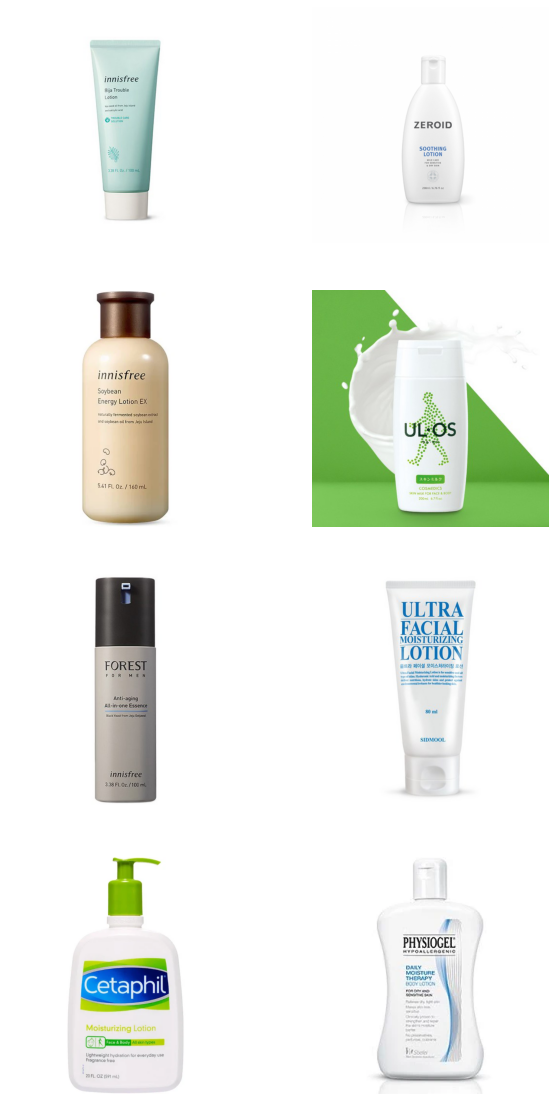

In [17]:
img_path = os.getenv('HOME') + '/aiffel/exploration/E18/data/images'
file_list = glob.glob(img_path + '/*.jpg')
print("file_list: {}".format(file_list))  # file_list 출력

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(file_list[i])
    ax.imshow(image)
    ax.axis("off")
plt.show()

## 2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

### 2-1. Google OCR API

In [ ]:
# !pip install --upgrade google-api-python-client
# !pip install google-cloud-vision

In [18]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

-rw-r--r-- 1 root root 2341 Sep 15 13:50 /aiffel/aiffel/exploration/E18/data/my_google_api_key.json


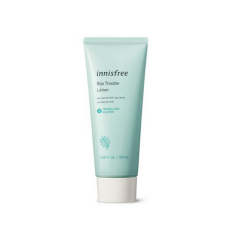

Texts:

"innisfree
Bija Trouble
Lotion
l om and
TROUBLE CARE
SOLUTION
338 FL Oz. / 100 m
"

"innisfree"

"Bija"

"Trouble"

"Lotion"

"l"

"om"

"and"

"TROUBLE"

"CARE"

"SOLUTION"

"338"

"FL"

"Oz."

"/"

"100"

"m"
bounds: (264,337),(270,337),(270,347),(264,347)
------------------------------------------------


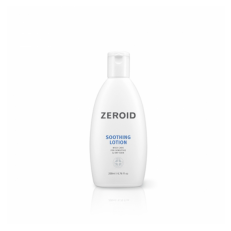

Texts:

"ZEROID
SOOTHING
LOTION
MILD CARE
rOR SENSIT
AY SEN
200mi /6.761 oz
"

"ZEROID"

"SOOTHING"

"LOTION"

"MILD"

"CARE"

"rOR"

"SENSIT"

"AY"

"SEN"

"200mi"

"/6.761"

"oz"
bounds: (272,383),(277,383),(277,386),(272,386)
------------------------------------------------


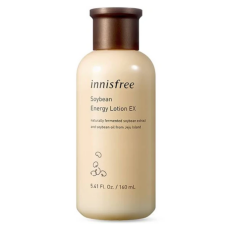

Texts:

"innisfree
Soybean
Energy Lotion EX
naturally fermented soybean extract
and soybean oil from Jeju Island
5.41 FL. Oz. / 160 mL
"

"innisfree"

"Soybean"

"Energy"

"Lotion"

"EX"

"naturally"

"fermented"

"soybean"

"extract"

"and"

"soybean"

"oil"

"from"

"Jeju"

"Island"

"5.41"

"FL."

"Oz."

"/"

"160"

"mL"
bounds: (335,491),(355,492),(355,507),(335,506)
------------------------------------------------


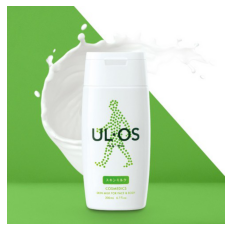

Texts:

"UL OS
スキンミルク
COSMEDICS
SKIN MILK FOR FACE a soor
200 m 67flor
"

"UL"

"OS"

"スキン"

"ミルク"

"COSMEDICS"

"SKIN"

"MILK"

"FOR"

"FACE"

"a"

"soor"

"200"

"m"

"67flor"
bounds: (246,429),(271,429),(271,435),(246,435)
------------------------------------------------


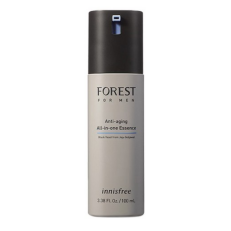

Texts:

"FOREST
FOR MEN
Anti-aging
All-in-one Essence
Dack Yeast from Jeju Goraval
innisfree
3.38 FL. Oz./100 mL
"

"FOREST"

"FOR"

"MEN"

"Anti-aging"

"All-in-one"

"Essence"

"Dack"

"Yeast"

"from"

"Jeju"

"Goraval"

"innisfree"

"3.38"

"FL."

"Oz./100"

"mL"
bounds: (277,435),(290,435),(290,445),(277,445)
------------------------------------------------


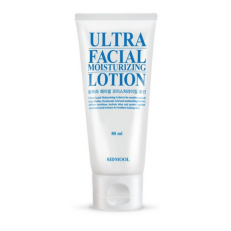

Texts:

"ULTRA
FACIAL
MOISTURIZING
LOTION
울트라 페이셜 모이스처라이징 로션
thra Fadal Mohturidng Ladon s for senstve and
tpeof . Hyalurek Adand turig
der ydrate snd prtet
i far healthierking s
80 ml
SIDMOOL
"

"ULTRA"

"FACIAL"

"MOISTURIZING"

"LOTION"

"울트라"

"페이셜"

"모이스처"

"라이징"

"로션"

"thra"

"Fadal"

"Mohturidng"

"Ladon"

"s"

"for"

"senstve"

"and"

"tpeof"

"."

"Hyalurek"

"Adand"

"turig"

"der"

"ydrate"

"snd"

"prtet"

"i"

"far"

"healthierking"

"s"

"80"

"ml"

"SIDMOOL"
bounds: (225,342),(276,342),(276,349),(225,349)
------------------------------------------------


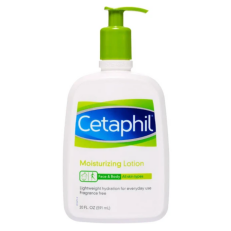

Texts:

"Cetaphil
Moisturizing Lotion
OR Face & Body All skin types
Lightweight hydration for everyday use
Fragrance free
20 FL. OZ (591 mL)
"

"Cetaphil"

"Moisturizing"

"Lotion"

"OR"

"Face"

"&"

"Body"

"All"

"skin"

"types"

"Lightweight"

"hydration"

"for"

"everyday"

"use"

"Fragrance"

"free"

"20"

"FL."

"OZ"

"(591"

"mL)"
bounds: (267,550),(283,551),(283,562),(267,561)
------------------------------------------------


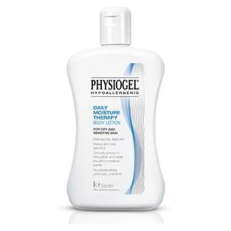

Texts:

"PHYSIOGEL
HYPOALLERGENIC
DAILY
MOISTURE
THERAPY
BOOY LOTION
Pon o AND
soatve N
"

"PHYSIOGEL"

"HYPOALLERGENIC"

"DAILY"

"MOISTURE"

"THERAPY"

"BOOY"

"LOTION"

"Pon"

"o"

"AND"

"soatve"

"N"
bounds: (147,177),(156,177),(156,182),(147,182)
------------------------------------------------


In [19]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
import glob
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv('HOME') + '/aiffel/exploration/E18/data/my_google_api_key.json'

img_path = os.getenv('HOME') + '/aiffel/exploration/E18/data/images'
file_list = glob.glob(img_path + "/*.jpg")

#위에서 정의한 OCR API 이용 함수 호출
for file in file_list:
    image = img.imread(file)
    plt.imshow(image)
    plt.axis("off")
    plt.show()    
    detect_text(file)
    print('------------------------------------------------')

### 2-2. Keras-ocr

In [ ]:
# $ pip install keras-ocr

In [20]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [21]:
images = [ keras_ocr.tools.read(file) for file in file_list]
prediction_groups = [pipeline.recognize([file]) for file in file_list]

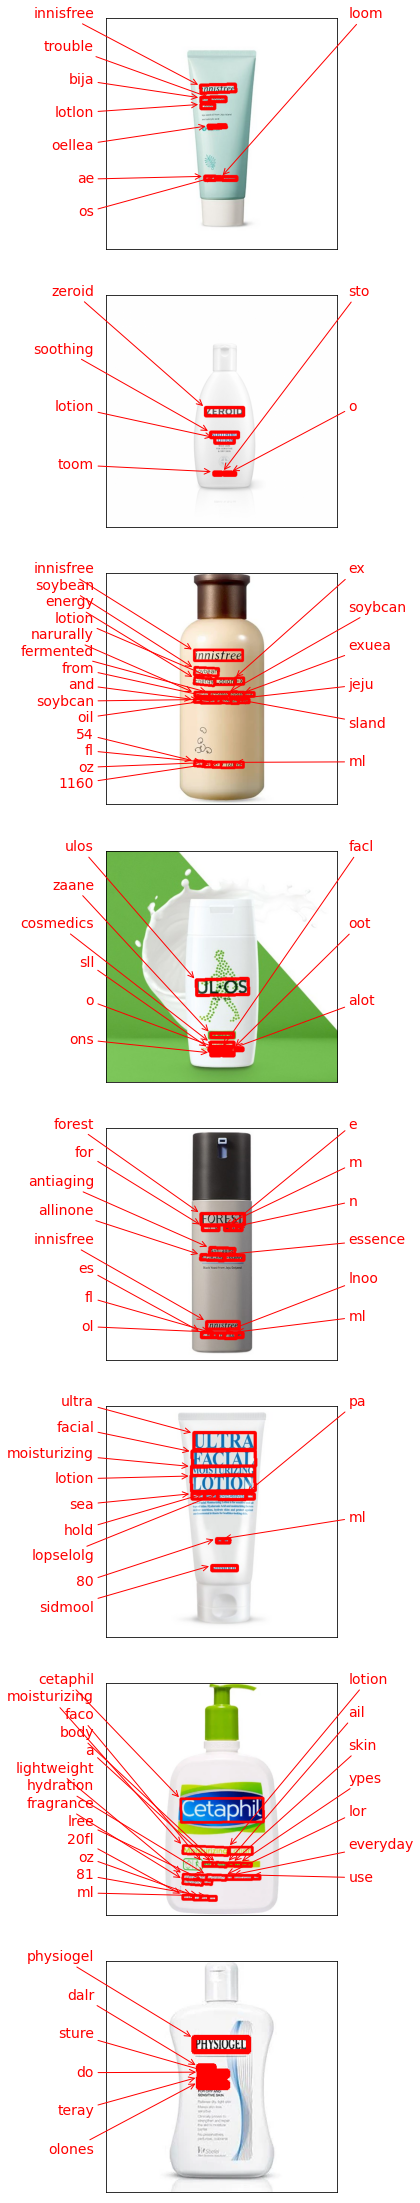

In [22]:
# 인식 결과 시각화
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

이미지 해상도가 너무 낮거나, 글씨 크기가 너무 작으면 텍스트 인식이 잘 되지 않는 것 같다.

### 2-3. 테서렉트

In [ ]:
# 클라우드 쉘을 열어 tesseract 관련 패키지를 설치해줍니다.
# $ sudo apt install tesseract-ocr
# $ sudo apt install libtesseract-dev

In [ ]:
# $ pip install pytesseract

In [37]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem3--psm'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',   # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )

    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]

        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]

            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [38]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [39]:
work_dir = os.getenv('HOME') + '/aiffel/exploration/E18/data/images'
img_file_path = work_dir + '/lotion3.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/exploration/E18/data/images/0000.png
/aiffel/aiffel/exploration/E18/data/images/0001.png
/aiffel/aiffel/exploration/E18/data/images/0002.png
/aiffel/aiffel/exploration/E18/data/images/0003.png
/aiffel/aiffel/exploration/E18/data/images/0004.png
/aiffel/aiffel/exploration/E18/data/images/0005.png
/aiffel/aiffel/exploration/E18/data/images/0006.png
/aiffel/aiffel/exploration/E18/data/images/0007.png
/aiffel/aiffel/exploration/E18/data/images/0008.png
/aiffel/aiffel/exploration/E18/data/images/0009.png
/aiffel/aiffel/exploration/E18/data/images/0010.png
/aiffel/aiffel/exploration/E18/data/images/0011.png
/aiffel/aiffel/exploration/E18/data/images/0012.png


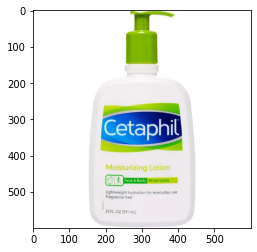

In [42]:
import cv2
image_path = os.getenv('HOME') + '/aiffel/exploration/E18/data/images'
image = image_path + '/lotion3.jpg'
img_bgr = cv2.imread(image)  # OpenCV로 이미지 읽기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [43]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

Moisturizing

-otT080)n

Lightweight

nyoratia

epiel

everyoay

Ve

rragrance

iTreea

7

ZU FL. O7

(S91

TUL}

Done


In [46]:
work_dir = os.getenv('HOME') + '/aiffel/exploration/E18/data/images'
img_file_path = work_dir + '/lotion1.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/exploration/E18/data/images/0000.png


tesseract의 경우, 이미지의 text를 detection 하지 못하는 경우가 많다.

## 3. 테스트 결과 정리

아래와 같이 대표 이미지 1개를 가지고 테스트 결과를 정리해보았다.

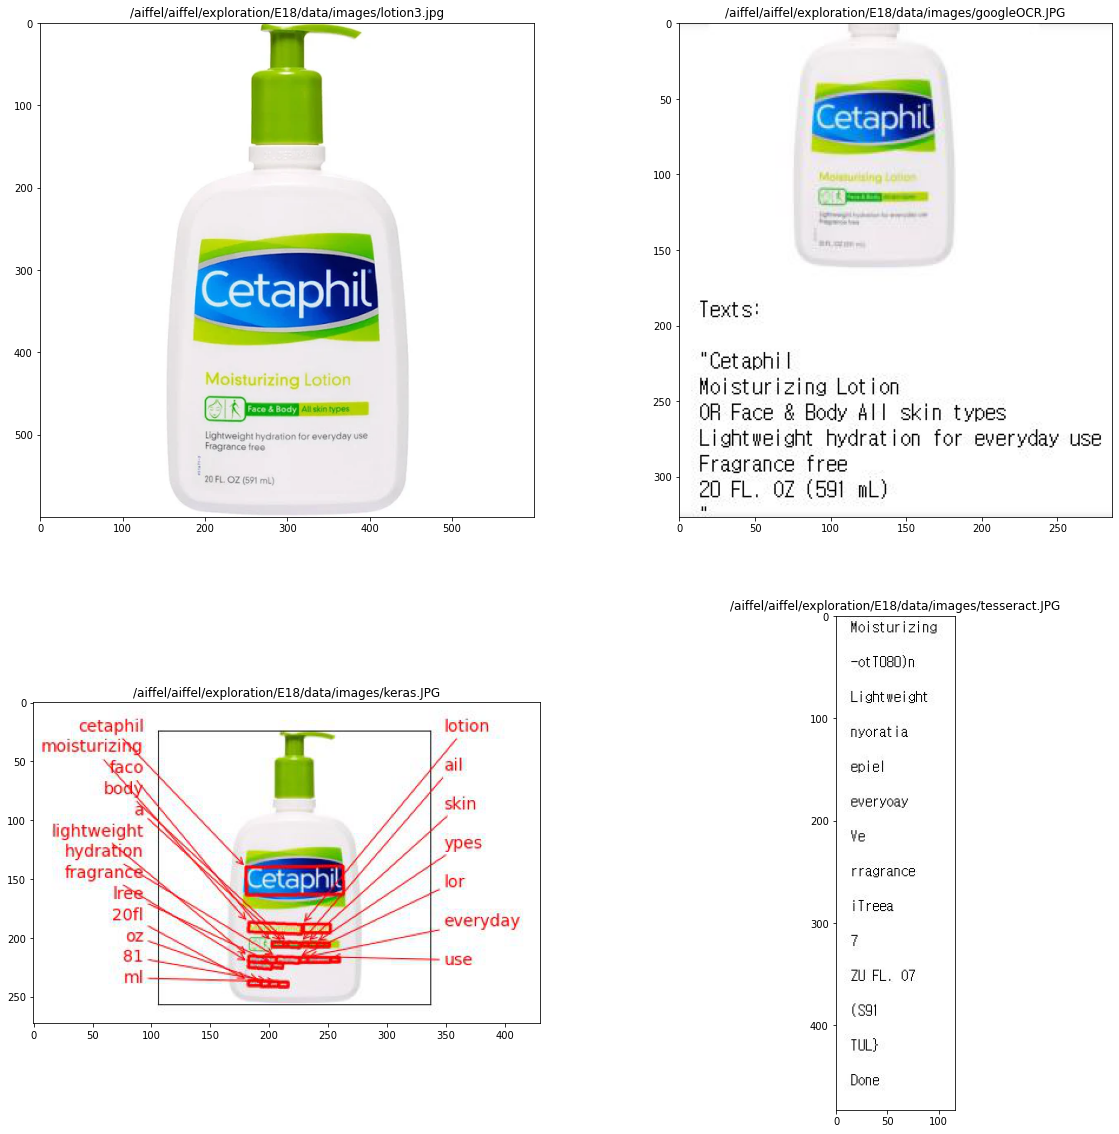

In [54]:
test_img1 = [work_dir + '/lotion3.jpg', 
             work_dir + '/googleOCR.JPG', 
             work_dir + '/keras.JPG', 
             work_dir + '/tesseract.JPG',]

plt.figure(figsize=(20,20))
for i in range(len(test_img1)):
    plt.subplot(2,2, i+1)
    plt.title(test_img1[i])
    plt.imshow(plt.imread(test_img1[i]))

- __googleOCR__ : 99% 정확도를 보였다.
- __Keras_OCR__ : 숫자, 알파벳 일부가 누락되었으나 약 80% 이상의 정확도를 보이는 것 같다.
- __tesseract__ : 정확도가 50% 미만이며, 일부 이미지는 아예 텍스트를 인식하지 못하였다.

## 4. 결과 분석과 결론 제시

### 1) 구현하고자 하는 서비스 : '화장품' 성분 검색 기능
- __목적__ : 화장품 구매 시 내가 원하는 화장품에 대한 정보를 검색하기 번거로운 사람들을 위해 간편하게 스마트폰 카메라 촬영 한 번으로 화장품의 정보를 한번에 불러오게 해줍니다.


- __구현 방식__ : 네이버의 스마트렌즈를 통해 와인라벨을 읽을 수 있는 기능에서 착안하여 __내가 관심있는 화장품의 이미지를 촬영하면 화장품의 텍스트 정보를 읽어 기존 서버에 저장되어 있는 해당 화장품의 정보__를 불러옵니다.

### 2) 평가기준
- 동일 브랜드(ex. 이니스프리)의 다양한 화장품 라인업(그린티, 포레스트, 블루벨리 리벨런싱, 제주 화산송이 등)이 존재 하기 때문에, __해당 브랜드 + 제품명 + 용량__ 등의 정보를 읽어서 기존 서버에 저장되어 있는 정보를 불러올 수 있게 해야한다.

### 3) 최적 모델 선정 : google OCR
- 총 3가지 모델(google, keras, tesseract)을 가지고 테스트를 진행한 결과, 평가기준에 가장 부합하는 모델은 __`google OCR`__ 모델이었다. 


- __테스트 결과 분석(요약)__
    - google OCR : 브랜드, 제품명, 용량 정보를 정확하게 인식하였다.
    - keras : 브랜드, 제품명은 정확하게 인식하였으나, 용량 정보의 인식 확률이 50% 정도이다.
    - tesseract : 브랜드, 제품명, 용량 정보 인식이 정확하지 않았다.

## 5. 회고

- OCR 기능은 활용 분야가 굉장히 무궁무진한 분야인 것 같다.  


- 여러가지 아이디어가 있었으나 원하는 사진을 구하는게 어려웠다. 어떤 프로젝트라도 성공적인 프로젝트를 진행하기 위해선 목적에 부합하는 최대한 많은 양의 데이터를 확보하는 것이 중요하다는 사실을 다시금 깨달았다.


- keras_OCR이 한글을 인식하지 못해서 다른 아이디어 구현을 시도해보지 못한게 아쉬웠다.


- 신관수님께서 공유해주신 결과 분석 코드를 이용해서 정량적인 평가를 진행해보지 못한 것이 아쉬웠다.